In [30]:
ano = 2023
caminho_dados = f"/content/drive/MyDrive/DRIVE/AD/{ano}_Viagem.csv"
caminho_saida_tabela = f"/content/drive/MyDrive/DRIVE/AD/output/tabela_{ano}.xlsx"
caminho_saida_grafico = f"/content/drive/MyDrive/DRIVE/AD/output/grafico_{ano}.png"

In [25]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns' , None)

# Lendo os dados
df_viagens = pd.read_csv(caminho_dados , encoding='Windows-1252' , sep=";" , decimal=",")

# Criando novo coluna de despesas
df_viagens['Despesas'] = df_viagens["Valor diárias"] + df_viagens["Valor passagens"] + df_viagens["Valor outros gastos"]

# Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

# Convertendo as colunas da tabela Original de datas
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format="%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format="%d/%m/%Y")

# Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias de viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days




In [26]:
df_viagens.head()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de viagem
0,17821923,000001/23-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.875.238-**,PRISCILA LEAL DA SILVA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2023-01-01,2023-12-02,Loughborough/Reino Unido,Intercâmbio acadêmico PCDP anterior 07/21-3C,0.00,0.00,0.00,0.00,0.00,January,335
1,18159396,000001/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.000.000-**,Ekaterina Pavlovskaia,NÃO IDENTIFICADO,-1,Sem informação,2023-02-25,2023-03-06,Pirenópolis/GO,Segue abaixo cópia da carta-convite enviada à ...,0.00,7894.50,0.00,0.00,7894.50,February,9
2,18236583,000018/23,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26236,Universidade Federal Fluminense,NaN,CAMILLA DUARTE DA SILVA,BIBLIOTECARIO-DOCUMENTALISTA,-1,Sem informação,2023-01-16,2024-02-28,Rio de Janeiro/RJ,Afastamento para pós-graduação stricto sensu n...,0.00,0.00,0.00,0.00,0.00,January,408
3,18288418,000007/23-1C,Realizada,SIM,Por necessidade do serviço.,52000,Ministério da Defesa,52121,Comando do Exército,***.621.358-**,ANDRE LUIS COSTA PITANGUEIRA,NÃO IDENTIFICADO,OfSuperior,OfSuperior,2023-01-10,2023-01-29,Nova York/Estados Unidos da América,Participar da revisão do COE Manual (Contingen...,39565.70,7434.13,0.00,1095.35,48095.18,January,19
4,18296348,000070/23,Realizada,SIM,A efetivação do empenho no Siafi e a respectiv...,26000,Ministério da Educação,26406,Instituto Federal do Espírito Santo,***.407.547-**,LIDIANY MIRANDA FERRAZ NUNES,AUXILIAR DE BIBLIIOTECA,-1,Sem informação,2023-02-05,2023-02-10,Vitória/ES,Participação das aulas de Mestrado Interinstit...,1013.96,0.00,0.00,0.00,1013.96,February,5


In [27]:
# Criando tabela consolidada
df_viagens_consolidado =  (
    df_viagens.
    groupby('Cargo')
    .agg(
        despesa_media=('Despesas', 'mean'),
        duracao_media=('Dias de viagem', 'mean'),
        despesas_totais=('Despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', 'count')
    )
    .reset_index()
    .sort_values('despesas_totais', ascending=False)
 )

# Filtrando tabela consolidada por cargos relevantes (>1% do total de viagens)
df_cargos =  df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final - Consolidada e filtrada
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

# Salvando a tabela final
df_final.to_excel(caminho_saida_tabela, index=False) # index=False exclui o index

In [28]:
df_final

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
495,NÃO IDENTIFICADO,3259.77,8.02,1054825608.35,Brasília/DF,323589
444,Informações protegidas por sigilo,3160.41,7.49,374188816.46,Informações protegidas por sigilo,118399
570,PROFESSOR DO MAGISTERIO SUPERIOR,2031.26,4.17,111307060.47,Brasília/DF,54797
571,PROFESSOR ENS BASICO TECN TECNOLOGICO,1402.99,2.39,52769327.23,Brasília/DF,37612
316,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
209,AUDITOR FISCAL FEDERAL AGROPECUARIO,1466.18,2.06,24315111.98,Brasília/DF,16584
72,ANALISTA AMBIENTAL,2596.04,5.13,35371056.07,Brasília/DF,13625
179,ASSISTENTE EM ADMINISTRAçãO,1292.90,2.24,15151518.48,Brasília/DF,11719
778,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855
688,TECNICO DO SEGURO SOCIAL,4306.11,11.38,45980663.32,Brasília/DF,10678


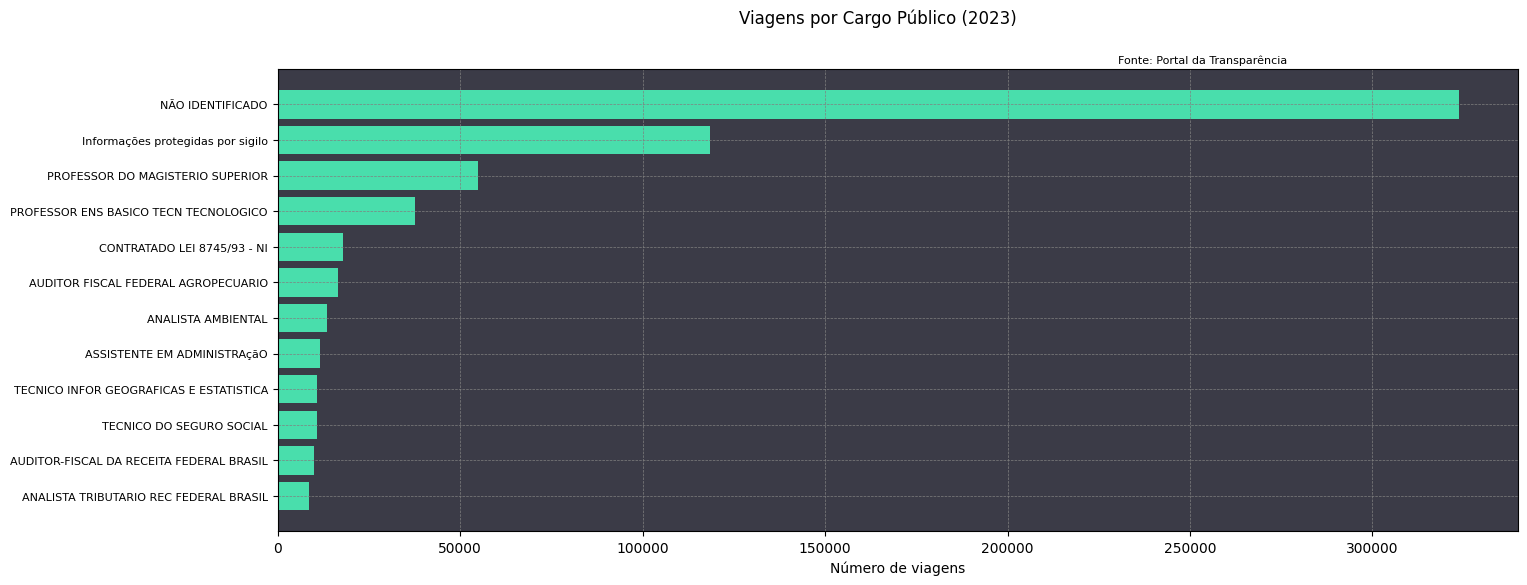

In [29]:
import matplotlib.pyplot as plt

# Criando a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plotando o gráfico
ax.barh(df_final['Cargo'], df_final['n_viagens'], color="#49deac")
ax.invert_yaxis() # inverte o eixo Y do maior para o menor

# Ajustando o gráfico
ax.set_facecolor('#3b3b47') # plano de fundo
fig.suptitle('Viagens por Cargo Público (2023)') # titulo do gráfico
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=8) # titulo da figura
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8) # tamanho do eixo Y
plt.xlabel('Número de viagens')


# Exibindo o gráfico
#plt.show()

# Salvando o gráfico
plt.savefig(caminho_saida_grafico, bbox_inches='tight')